✅ Completed Data Science Tasks (COVID-19 Dataset)

Task 1:
Top 5 States by Confirmed COVID-19 Cases  
→ Bar chart showing the 5 states with the highest confirmed cases on the latest available date.

Task 2:
7-Day Moving Average of Daily New Confirmed COVID-19 Cases  
→ Line plot of 5 selected states showing the smoothed trend of daily new confirmed cases over time using a 7-day rolling average.

Task 3:
Top 5 States by COVID-19 Death Rate  
→ Horizontal bar chart showing the top 5 states with the highest death rate (Deceased / Confirmed), formatted as percentages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('states.csv')
df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,India,1,0,0,0,0
1,2020-01-30,Kerala,1,0,0,0,0
2,2020-02-02,India,2,0,0,0,0
3,2020-02-02,Kerala,2,0,0,0,0
4,2020-02-03,India,3,0,0,0,0
...,...,...,...,...,...,...,...
45609,2023-08-22,Telangana,844413,840295,4111,0,0
45610,2023-08-22,Tripura,108477,107465,942,66,2603403
45611,2023-08-22,Uttar Pradesh,2145416,2121650,23709,0,0
45612,2023-08-22,Uttarakhand,452562,444794,7768,0,10173807


Task 1: Top 5 States by Confirmed COVID-19 Cases

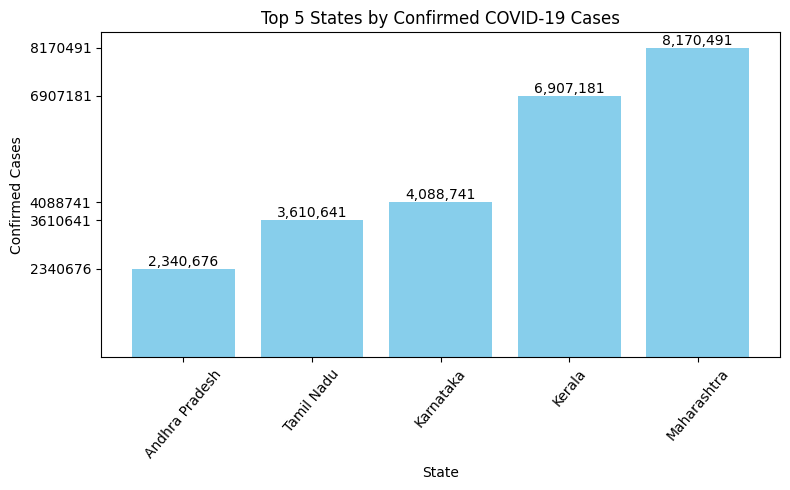

In [4]:
#Top 5 States by Total Confirmed Cases

#filtering data to last date where only state name are avalable
df['Date'] = pd.to_datetime(df['Date'])
latest_date = df['Date'].max()
df_latest = df[df['Date'] == latest_date]
df_latest = df_latest[df_latest['State'] != 'India']
Top_5_confirmed_state = df_latest.sort_values('Confirmed', ascending=False).head(5)

name_of_top_5_state=Top_5_confirmed_state['State'].tolist()
number_of_top_5_state=Top_5_confirmed_state['Confirmed'].tolist()
number_of_top_5_state = number_of_top_5_state[::-1]
name_of_top_5_state = name_of_top_5_state[::-1]

#Ploting
# Plotting
plt.figure(figsize=(8,5))
plt.bar(name_of_top_5_state, number_of_top_5_state, color='skyblue')
plt.title("Top 5 States by Confirmed COVID-19 Cases")
plt.xlabel("State")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=50)
plt.yticks(number_of_top_5_state,number_of_top_5_state)
plt.tight_layout()

# Plotting the data values over the bar
for i in range(len(name_of_top_5_state)):
    plt.text(i, number_of_top_5_state[i], f"{number_of_top_5_state[i]:,}", 
             ha='center', va='bottom', fontsize=10, color='black')



Task 2: Daily New Cases & 7-Day Moving Average for 5 Key States

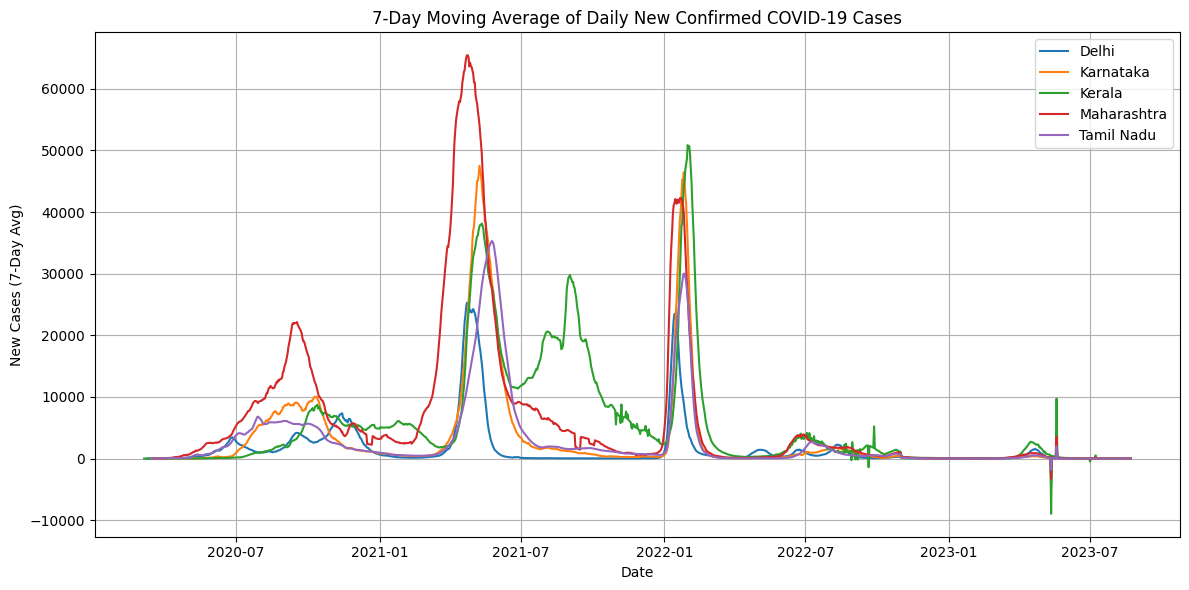

In [7]:
# Task 2: 7-Day Moving Average of Daily New Confirmed Cases

df_task2 = df[df['State'].isin(['Maharashtra', 'Kerala', 'Delhi', 'Tamil Nadu', 'Karnataka'])].copy()
df_task2['Date'] = pd.to_datetime(df_task2['Date'])
df_task2 = df_task2.sort_values(['State', 'Date'])

df_task2['Daily new cases'] = df_task2.groupby('State')['Confirmed'].diff()
df_task2['7-Day Avg'] = df_task2.groupby('State')['Daily new cases'].transform(lambda x: x.rolling(7).mean())

plt.figure(figsize=(12, 6))
for state in df_task2['State'].unique():
    state_data = df_task2[df_task2['State'] == state]
    plt.plot(state_data['Date'], state_data['7-Day Avg'], label=state)

plt.title("7-Day Moving Average of Daily New Confirmed COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases (7-Day Avg)")
plt.legend()
plt.tight_layout()
plt.grid(True)


Task 3: State-wise Total Death Rate (%) Analysis

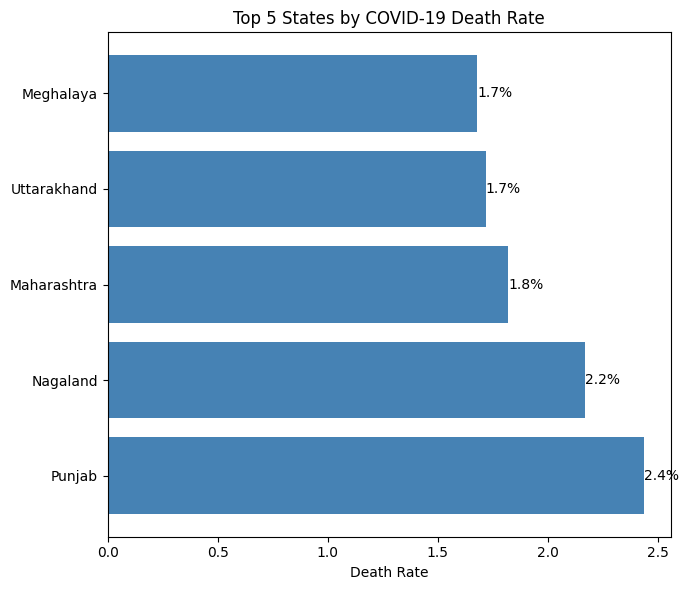

In [54]:
#getiing top 5 state with most death rate
df['Date'].max()
df_task3_latest_date=df[df['Date']==df['Date'].max()].copy()
df_task3=df_task3_latest_date[df_task3_latest_date['State']!='India'].copy()
df_task3['Death rate'] = (df_task3['Deceased'] / df_task3['Confirmed']) * 100
df_task3_sorted = df_task3.sort_values('Death rate', ascending=False).head(5)
df_task3_sorted
#ploting
plt.figure(figsize=(7,6))
plt.barh(df_task3_sorted['State'], df_task3_sorted['Death rate'], color='steelblue')

for i in range(len(df_task3_sorted)):
    plt.text(df_task3_sorted['Death rate'].iloc[i], i, 
             f"{df_task3_sorted['Death rate'].iloc[i]:.1f}%", 
             va='center', ha='left', color='black')



plt.xlabel("Death Rate")
plt.title("Top 5 States by COVID-19 Death Rate")
plt.tight_layout()
plt.show()